# 230968078 - Ishan - Week4

In [1]:
import pandas as pd

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Rescaling, Dropout, BatchNormalization, MaxPooling2D, Lambda, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, vgg16, InceptionV3, inception_v3, ResNet50, resnet50, EfficientNetB0, efficientnet, MobileNetV2, mobilenet_v2

2025-08-23 13:28:47.438102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755955727.773847      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755955727.868611      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
cat_train = "/kaggle/input/cats-and-dogs-filtered/cats_and_dogs_filtered/train"
cat_val = "/kaggle/input/cats-and-dogs-filtered/cats_and_dogs_filtered/validation"

In [5]:
mask_train = '/kaggle/input/facemask789/Face Mask Dataset/Train'
mask_val = '/kaggle/input/facemask789/Face Mask Dataset/Validation'
mask_test = '/kaggle/input/facemask789/Face Mask Dataset/Test'

## Lenet 5 Model

In [6]:
cat_train_lenet = image_dataset_from_directory(
    cat_train,
    image_size=(32, 32),
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)
cat_val_lenet = image_dataset_from_directory(
    cat_val,
    image_size=(32, 32),
    color_mode="grayscale",
    batch_size=32,
    shuffle=False
)

Found 2000 files belonging to 2 classes.


I0000 00:00:1755955761.176915      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755955761.177629      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 1000 files belonging to 2 classes.


In [7]:
mask_train_lenet = image_dataset_from_directory(
    mask_train,
    image_size=(32, 32),
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)
mask_val_lenet = image_dataset_from_directory(
    mask_val,
    image_size=(32, 32),
    color_mode="grayscale",
    batch_size=32,
    shuffle=True
)
mask_test_lenet = image_dataset_from_directory(
    mask_test,
    image_size=(32, 32),
    color_mode="grayscale",
    batch_size=32,
    shuffle=False
)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [8]:
normalization_layer = Rescaling(1./255)
cat_train_lenet = cat_train_lenet.map(lambda x, y: (normalization_layer(x), y))
cat_val_lenet = cat_val_lenet.map(lambda x, y: (normalization_layer(x), y))
mask_train_lenet = mask_train_lenet.map(lambda x, y: (normalization_layer(x), y))
mask_val_lenet = mask_val_lenet.map(lambda x, y: (normalization_layer(x), y))
mask_test_lenet = mask_test_lenet.map(lambda x, y: (normalization_layer(x), y))

In [9]:
lenet = Sequential([
    Conv2D(6, kernel_size=5, activation='tanh', input_shape=(32, 32,1)),
    AveragePooling2D(pool_size=2, strides=2),
    Conv2D(16, kernel_size=5, activation='tanh'),
    AveragePooling2D(pool_size=2, strides=2),
    Conv2D(120, kernel_size=5, activation='tanh'),
    Flatten(),
    Dense(84, activation='tanh'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,941 (238.05 KB)

 Trainable params: 60,941 (238.05 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
lenet.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
cat_history_lenet = lenet.fit(
    cat_train_lenet, 
    validation_data = cat_val_lenet,
    epochs=10
)

Epoch 1/10


I0000 00:00:1755955794.493710     103 service.cc:148] XLA service 0x7c5d60005600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755955794.494962     103 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755955794.494986     103 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755955794.788761     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


12/63 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4853 - loss: 0.6984

I0000 00:00:1755955797.401311     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.4819 - loss: 0.6982 - val_accuracy: 0.5410 - val_loss: 0.6915
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5181 - loss: 0.6917 - val_accuracy: 0.5120 - val_loss: 0.6906
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5469 - loss: 0.6891 - val_accuracy: 0.5360 - val_loss: 0.6881
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5193 - loss: 0.6897 - val_accuracy: 0.5440 - val_loss: 0.6869
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5387 - loss: 0.6888 - val_accuracy: 0.5500 - val_loss: 0.6874
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5571 - loss: 0.6843 - val_accuracy: 0.5330 - val_loss: 0.6881
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5465 - loss: 0.6861 - val_accuracy: 0.5310 - val_loss: 0.6887
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5574 - loss: 0.6813 - val_accuracy: 0.5410 - val_loss: 0.

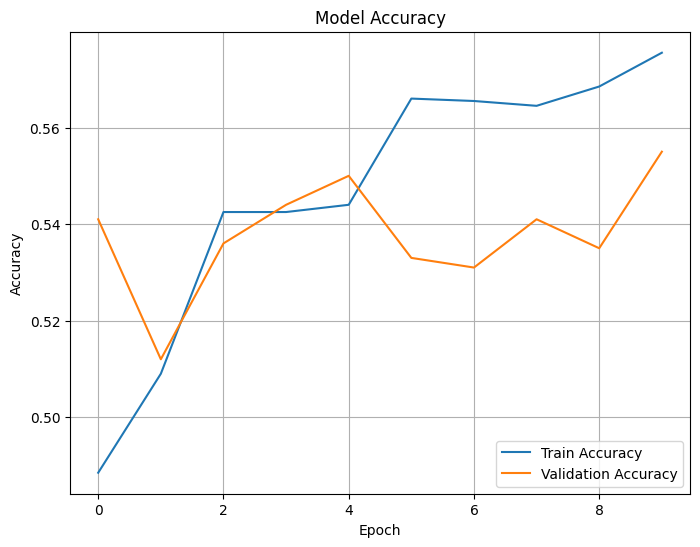

In [13]:
plt.figure(figsize=(8,6))
plt.plot(cat_history_lenet.history['accuracy'], label='Train Accuracy')
plt.plot(cat_history_lenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [14]:
cat_loss_lenet, cat_acc_lenet = lenet.evaluate(cat_val_lenet)
print(cat_loss_lenet, cat_acc_lenet)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5909 - loss: 0.6710
0.6893828511238098 0.5550000071525574


In [15]:
mask_history_lenet = lenet.fit(
    mask_train_lenet, 
    validation_data = mask_val_lenet,
    epochs=10
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.7583 - loss: 0.4965 - val_accuracy: 0.8850 - val_loss: 0.2984
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8934 - loss: 0.2503 - val_accuracy: 0.9000 - val_loss: 0.2396
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9279 - loss: 0.1777 - val_accuracy: 0.9162 - val_loss: 0.2045
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9320 - loss: 0.1670 - val_accuracy: 0.9087 - val_loss: 0.2305
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9395 - loss: 0.1626 - val_accuracy: 0.9237 - val_loss: 0.1694
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9510 - loss: 0.1329 - val_accuracy: 0.9287 - val_loss: 0.1627
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9498 - loss: 0.1267 - val_accuracy: 0.9400 - val_loss: 0.1459
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9570 - loss: 0.1120 - val_acc

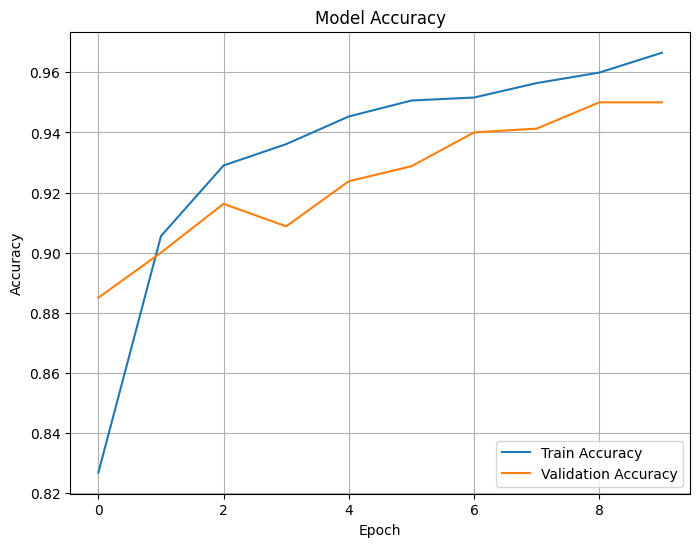

In [16]:
plt.figure(figsize=(8,6))
plt.plot(mask_history_lenet.history['accuracy'], label='Train Accuracy')
plt.plot(mask_history_lenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [19]:
mask_loss_lenet, mask_acc_lenet = lenet.evaluate(mask_test_lenet)
print(mask_loss_lenet, mask_acc_lenet)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9330 - loss: 0.2013
0.11772452294826508 0.9586693644523621


## Alex Net

In [21]:
cat_train_alex = image_dataset_from_directory(
    cat_train,
    image_size=(227, 227),
    batch_size=32,
    shuffle=True
)
cat_val_alex = image_dataset_from_directory(
    cat_val,
    image_size=(227, 227),
    batch_size=32,
    shuffle=False
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [22]:
mask_train_alex = image_dataset_from_directory(
    mask_train,
    image_size=(227, 227),
    batch_size=32,
    shuffle=True
)
mask_val_alex = image_dataset_from_directory(
    mask_val,
    image_size=(227, 227),
    batch_size=32,
    shuffle=True
)
mask_test_alex = image_dataset_from_directory(
    mask_test,
    image_size=(227, 227),
    batch_size=32,
    shuffle=False
)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [23]:
cat_train_alex = cat_train_alex.map(lambda x, y: (normalization_layer(x), y))
cat_val_alex = cat_val_alex.map(lambda x, y: (normalization_layer(x), y))
mask_train_alex = mask_train_alex.map(lambda x, y: (normalization_layer(x), y))
mask_val_alex = mask_val_alex.map(lambda x, y: (normalization_layer(x), y))
mask_test_alex = mask_test_alex.map(lambda x, y: (normalization_layer(x), y))

In [25]:
alex = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

In [26]:
alex.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,285,441 (222.34 MB)

 Trainable params: 58,285,441 (222.34 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
alex.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
cat_history_alex = alex.fit(
    cat_train_alex, 
    validation_data = cat_val_alex,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.5000 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5048 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.7066
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5275 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.7024
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5199 - loss: 0.6924 - val_accuracy: 0.5380 - val_loss: 0.6722
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5759 - loss: 0.6778 - val_accuracy: 0.5700 - val_loss: 0.6779
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5870 - loss: 0.6746 - val_accuracy: 0.6230 - val_loss: 0.6561
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6242 - loss: 0.6541 - val_accuracy: 0.5700 - val_loss: 0.6781
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6504 - loss: 0.6377 - val_accuracy: 0.6720 -

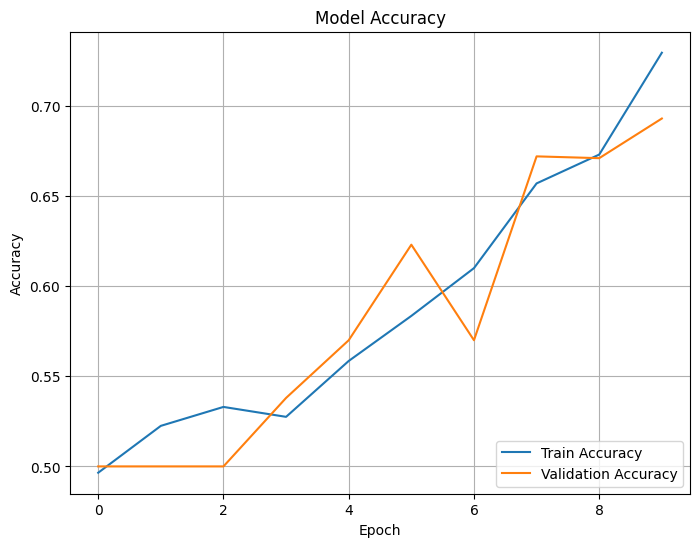

In [29]:
plt.figure(figsize=(8,6))
plt.plot(cat_history_alex.history['accuracy'], label='Train Accuracy')
plt.plot(cat_history_alex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [30]:
cat_loss_alex, cat_acc_alex = alex.evaluate(cat_val_alex)
print(cat_loss_alex, cat_acc_alex)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7492 - loss: 0.5466
0.5909423232078552 0.6930000185966492


In [31]:
mask_history_alex = alex.fit(
    mask_train_alex, 
    validation_data = mask_val_alex,
    epochs=10
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8667 - loss: 0.2975 - val_accuracy: 0.9825 - val_loss: 0.0428
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.9728 - loss: 0.0825 - val_accuracy: 0.9900 - val_loss: 0.0293
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9833 - loss: 0.0539 - val_accuracy: 0.9862 - val_loss: 0.0408
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9886 - loss: 0.0333 - val_accuracy: 0.9925 - val_loss: 0.0174
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.9864 - loss: 0.0326 - val_accuracy: 0.9912 - val_loss: 0.0275
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.9898 - loss: 0.0244 - val_accuracy: 0.9962 - val_loss: 0.0151
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.9941 - loss: 0.0167 - val_accuracy: 0.9937 - val_loss: 0.0191
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9941 - loss: 0.0174 - 

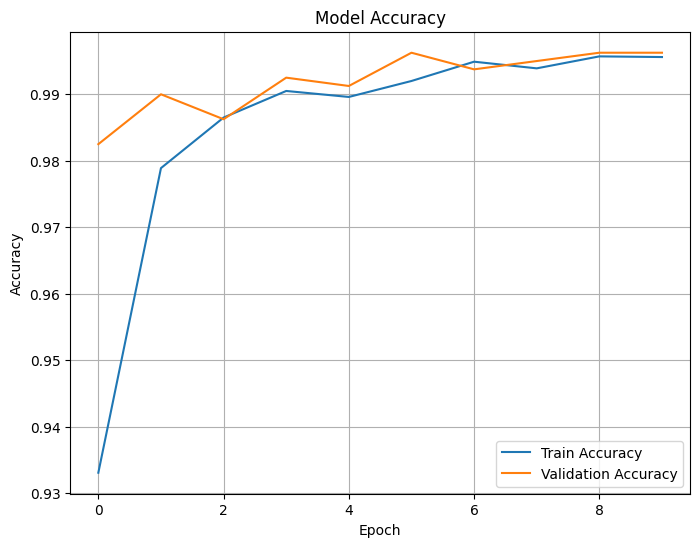

In [32]:
plt.figure(figsize=(8,6))
plt.plot(mask_history_alex.history['accuracy'], label='Train Accuracy')
plt.plot(mask_history_alex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [33]:
mask_loss_alex, mask_acc_alex = alex.evaluate(mask_test_alex)
print(mask_loss_alex, mask_acc_alex)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9875 - loss: 0.0521
0.045836593955755234 0.9899193644523621


## VGG-16 Model

In [34]:
cat_train = image_dataset_from_directory(
    cat_train,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)
cat_val = image_dataset_from_directory(
    cat_val,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [35]:
mask_train = image_dataset_from_directory(
    mask_train,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)
mask_val = image_dataset_from_directory(
    mask_val,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)
mask_test = image_dataset_from_directory(
    mask_test,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [37]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False

vgg = Sequential([
    Rescaling(1./255),
    Lambda(vgg16.preprocess_input),
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [39]:
vgg.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [40]:
vgg_history_cat = vgg.fit(
    cat_train,
    validation_data=cat_val,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 631ms/step - accuracy: 0.5439 - loss: 1.4462 - val_accuracy: 0.5000 - val_loss: 0.6996
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.4961 - loss: 0.6982 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step - accuracy: 0.4820 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.4852 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.5023 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accu

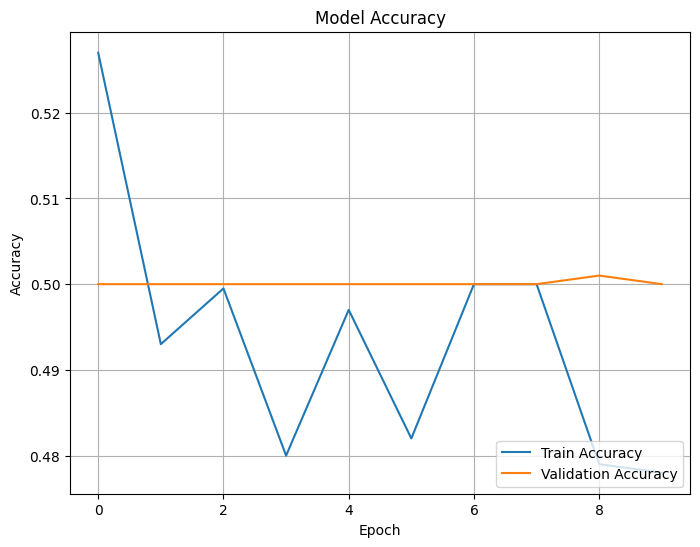

In [41]:
plt.figure(figsize=(8,6))
plt.plot(vgg_history_cat.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history_cat.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [42]:
cat_loss_vgg, cat_acc_vgg = vgg.evaluate(cat_val)
print(cat_loss_vgg, cat_acc_vgg)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.8206 - loss: 0.6928
0.693146824836731 0.5


In [43]:
vgg_history_mask = vgg.fit(
    mask_train,
    validation_data=mask_val,
    epochs=10
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 233ms/step - accuracy: 0.4849 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 225ms/step - accuracy: 0.4932 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 228ms/step - accuracy: 0.4930 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 229ms/step - accuracy: 0.4928 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 228ms/step - accuracy: 0.4947 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 229ms/step - accuracy: 0.4957 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 229ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 226ms/step - accuracy: 0.4931 - loss: 0

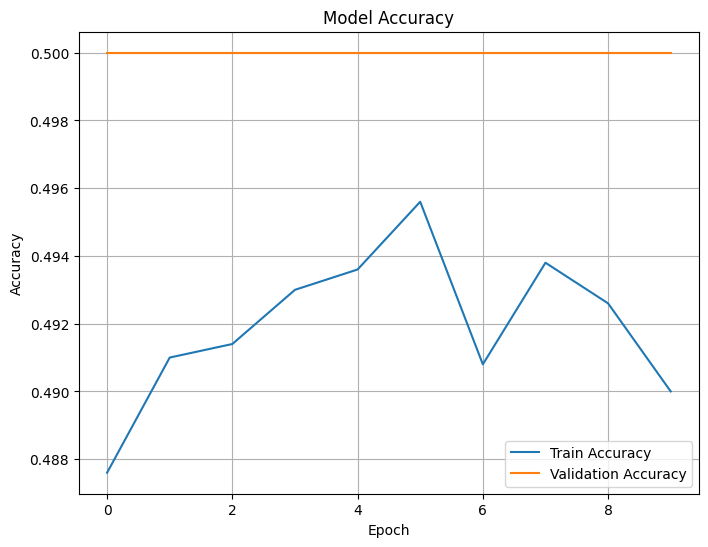

In [44]:
plt.figure(figsize=(8,6))
plt.plot(vgg_history_mask.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history_mask.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [45]:
mask_loss_vgg, mask_acc_vgg = vgg.evaluate(mask_test)
print(mask_loss_vgg, mask_acc_vgg)

31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.1816 - loss: 0.6946
0.6930881142616272 0.5131048560142517


## GoogleNet Model

In [77]:
cat_train = "/kaggle/input/cats-and-dogs-filtered/cats_and_dogs_filtered/train"
cat_val = "/kaggle/input/cats-and-dogs-filtered/cats_and_dogs_filtered/validation"

In [78]:
cat_train_gn = image_dataset_from_directory(
    cat_train,
    image_size=(299, 299),
    batch_size=32,
    shuffle=True
)
cat_val_gn = image_dataset_from_directory(
    cat_val,
    image_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [79]:
mask_train = "/kaggle/input/facemask789/Face Mask Dataset/Train"
mask_val = "/kaggle/input/facemask789/Face Mask Dataset/Validation"
mask_test = "/kaggle/input/facemask789/Face Mask Dataset/Test"

In [80]:
mask_train_gn = image_dataset_from_directory(
    mask_train,
    image_size=(299, 299),
    batch_size=32,
    shuffle=True
)
mask_val_gn = image_dataset_from_directory(
    mask_val,
    image_size=(299, 299),
    batch_size=32,
    shuffle=True
)
mask_test_gn = image_dataset_from_directory(
    mask_test,
    image_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [81]:
gn_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
gn_base.trainable = False

gn = Sequential([
    Rescaling(1./255),
    Lambda(inception_v3.preprocess_input),
    gn_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [82]:
gn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [83]:
gn_history_cat = gn.fit(
    cat_train_gn,
    validation_data=cat_val_gn,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 566ms/step - accuracy: 0.5498 - loss: 0.7100 - val_accuracy: 0.6190 - val_loss: 0.6499
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.6053 - loss: 0.6573 - val_accuracy: 0.6280 - val_loss: 0.6426
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.6232 - loss: 0.6478 - val_accuracy: 0.6480 - val_loss: 0.6255
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.6500 - loss: 0.6280 - val_accuracy: 0.6640 - val_loss: 0.6205
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.6524 - loss: 0.6195 - val_accuracy: 0.6530 - val_loss: 0.6231
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.6388 - loss: 0.6281 - val_accuracy: 0.6690 - val_loss: 0.6151
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.6564 - loss: 0.6184 - val_accuracy: 0.6440 - val_loss: 0.6320
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.6660 - loss: 0.6193 - val_accu

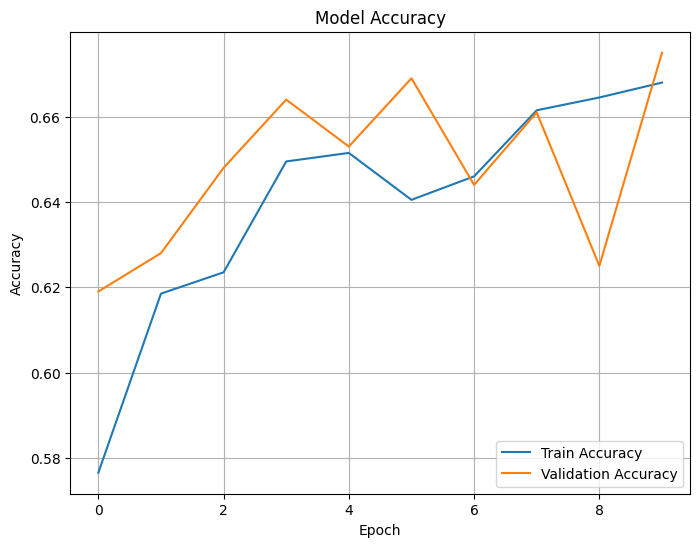

In [84]:
plt.figure(figsize=(8,6))
plt.plot(gn_history_cat.history['accuracy'], label='Train Accuracy')
plt.plot(gn_history_cat.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [85]:
cat_loss_gn, cat_acc_gn = gn.evaluate(cat_val_gn)
print(cat_loss_gn, cat_acc_gn)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.6764 - loss: 0.6353
0.6029213070869446 0.675000011920929


In [86]:
gn_history_mask = gn.fit(
    mask_train_gn,
    validation_data=mask_val_gn,
    epochs=10
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.5065 - loss: 0.7104 - val_accuracy: 0.7163 - val_loss: 0.6020
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.6925 - loss: 0.5935 - val_accuracy: 0.8400 - val_loss: 0.4887
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.7845 - loss: 0.4878 - val_accuracy: 0.8875 - val_loss: 0.3769
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.8266 - loss: 0.4176 - val_accuracy: 0.8650 - val_loss: 0.3603
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8500 - loss: 0.3760 - val_accuracy: 0.9062 - val_loss: 0.3081
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.8728 - loss: 0.3393 - val_accuracy: 0.9225 - val_loss: 0.2693
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.8726 - loss: 0.3324 - val_accuracy: 0.9250 - val_loss: 0.2419
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.8819 - loss: 0

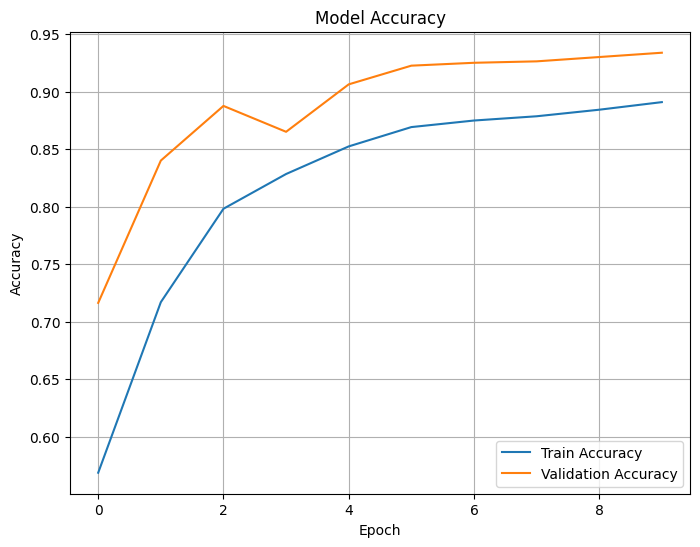

In [87]:
plt.figure(figsize=(8,6))
plt.plot(gn_history_mask.history['accuracy'], label='Train Accuracy')
plt.plot(gn_history_mask.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [88]:
mask_loss_gn, mask_acc_gn = gn.evaluate(mask_test_gn)
print(mask_loss_gn, mask_acc_gn)

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9233 - loss: 0.2197
0.20200185477733612 0.9385080933570862


## ResNet 50 Model

In [50]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base.trainable = False

resnet = Sequential([
    Rescaling(1./255),
    Lambda(resnet50.preprocess_input),
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [51]:
resnet.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [52]:
resnet_history_cat = resnet.fit(
    cat_train,
    validation_data=cat_val,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 340ms/step - accuracy: 0.5059 - loss: 0.7536 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.5286 - loss: 0.6990 - val_accuracy: 0.6220 - val_loss: 0.6765
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5369 - loss: 0.6869 - val_accuracy: 0.6220 - val_loss: 0.6758
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.5573 - loss: 0.6799 - val_accuracy: 0.5000 - val_loss: 0.6867
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5536 - loss: 0.6802 - val_accuracy: 0.6020 - val_loss: 0.6707
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.5756 - loss: 0.6825 - val_accuracy: 0.6270 - val_loss: 0.6665
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5783 - loss: 0.6753 - val_accuracy: 0.6190 - val_loss: 0.6648
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.5675 - loss: 0.6722 - val_accuracy: 

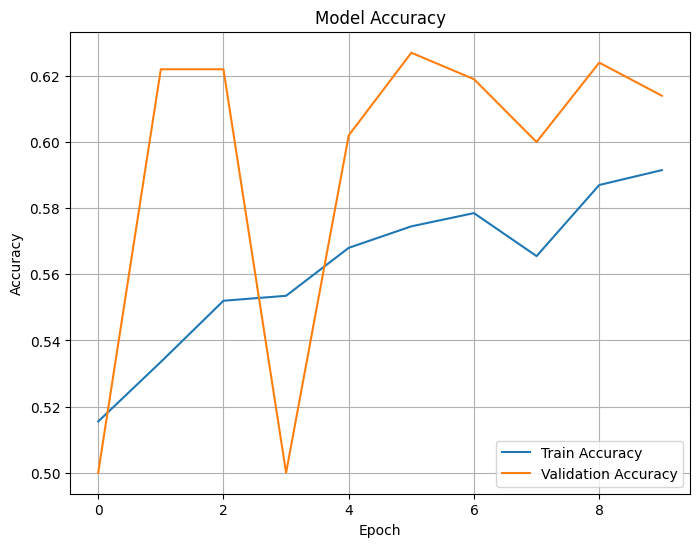

In [53]:
plt.figure(figsize=(8,6))
plt.plot(resnet_history_cat.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history_cat.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [54]:
cat_loss_resnet, cat_acc_resnet = resnet.evaluate(cat_val)
print(cat_loss_resnet, cat_acc_resnet)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7493 - loss: 0.6319
0.6571072340011597 0.6140000224113464


In [55]:
resnet_history_mask = resnet.fit(
    mask_train,
    validation_data=mask_val,
    epochs=10
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.4870 - loss: 0.7023 - val_accuracy: 0.4963 - val_loss: 0.6939
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.4963 - val_loss: 0.6939
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.4873 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.4947 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.4900 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4958 - loss: 0.6

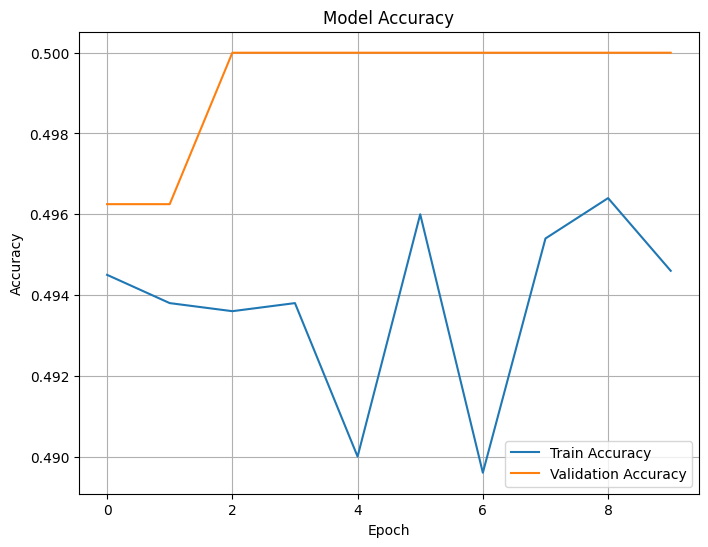

In [56]:
plt.figure(figsize=(8,6))
plt.plot(resnet_history_mask.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history_mask.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [57]:
mask_loss_resnet, mask_acc_resnet = resnet.evaluate(mask_test)
print(mask_loss_resnet, mask_acc_resnet)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.1816 - loss: 0.6943
0.693182110786438 0.5131048560142517


## EfficientNetB0 Model

In [58]:
en_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
en_base.trainable = False

en = Sequential([
    Rescaling(1./255),
    Lambda(efficientnet.preprocess_input),
    en_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [60]:
en.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [61]:
en_history_cat = en.fit(
    cat_train,
    validation_data=cat_val,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 431ms/step - accuracy: 0.4861 - loss: 0.7124 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5034 - loss: 0.6993 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5043 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5171 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4638 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5033 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4900 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5000 -

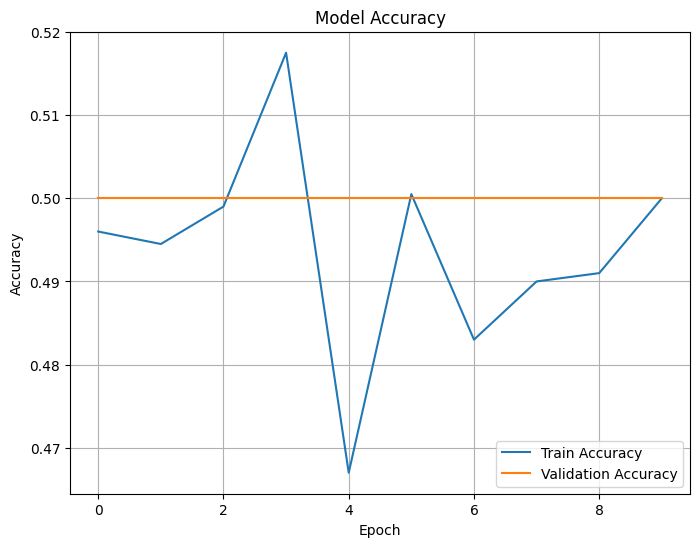

In [62]:
plt.figure(figsize=(8,6))
plt.plot(en_history_cat.history['accuracy'], label='Train Accuracy')
plt.plot(en_history_cat.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [63]:
cat_loss_en, cat_acc_en = en.evaluate(cat_val)
print(cat_loss_en, cat_acc_en)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1794 - loss: 0.6933
0.6931469440460205 0.5


In [64]:
en_history_mask = en.fit(
    mask_train,
    validation_data=mask_val,
    epochs=10
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.4924 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.4895 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.4911 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.4880 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.4937 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.4907 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4975 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.4880 - loss: 0.6932 - 

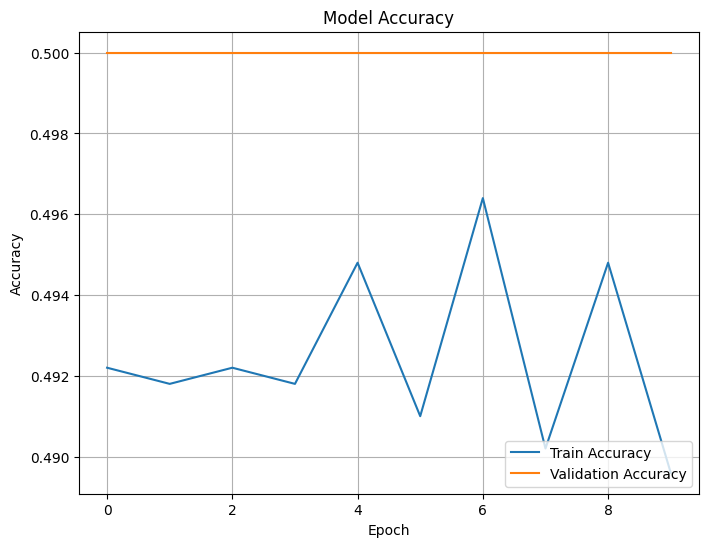

In [65]:
plt.figure(figsize=(8,6))
plt.plot(en_history_mask.history['accuracy'], label='Train Accuracy')
plt.plot(en_history_mask.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [66]:
mask_loss_en, mask_acc_en = en.evaluate(mask_test)
print(mask_loss_en, mask_acc_en)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1816 - loss: 0.6942
0.6931060552597046 0.5131048560142517


## MobileNetV2 Model

In [68]:
mv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mv_base.trainable = False

mv = Sequential([
    Rescaling(1./255),
    Lambda(mobilenet_v2.preprocess_input),
    mv_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [69]:
mv.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [70]:
mv_history_cat = mv.fit(
    cat_train,
    validation_data=cat_val,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - accuracy: 0.5157 - loss: 0.7878 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5116 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4977 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4830 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5052 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 -

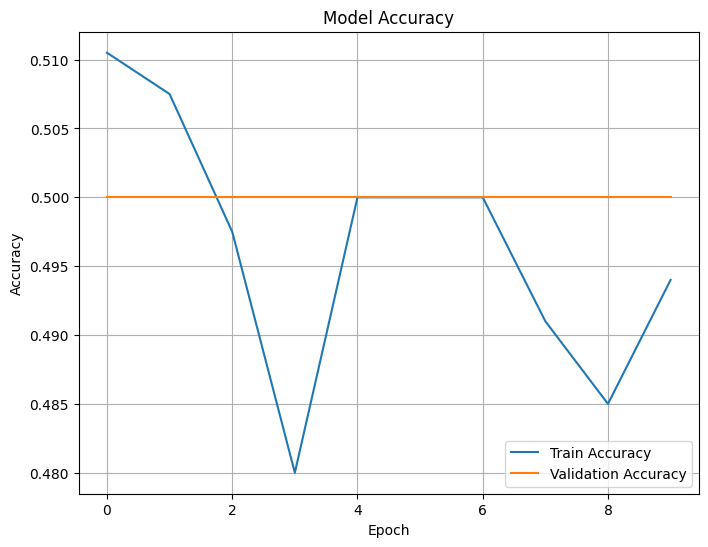

In [71]:
plt.figure(figsize=(8,6))
plt.plot(mv_history_cat.history['accuracy'], label='Train Accuracy')
plt.plot(mv_history_cat.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [72]:
cat_loss_mv, cat_acc_mv = mv.evaluate(cat_val)
print(cat_loss_mv, cat_acc_mv)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1794 - loss: 0.6933
0.6931471824645996 0.5


In [73]:
mv_history_mask = mv.fit(
    mask_train,
    validation_data=mask_val,
    epochs=10
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4826 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4907 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.4909 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4916 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4942 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4867 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4953 - loss: 0.6932 - val_accu

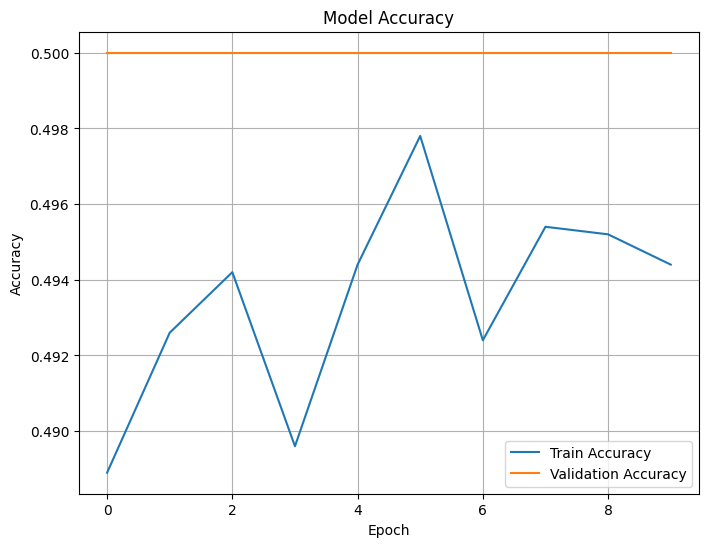

In [74]:
plt.figure(figsize=(8,6))
plt.plot(mv_history_mask.history['accuracy'], label='Train Accuracy')
plt.plot(mv_history_mask.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [75]:
mask_loss_mv, mask_acc_mv = mv.evaluate(mask_test)
print(mask_loss_mv, mask_acc_mv)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1816 - loss: 0.6942
0.6931059956550598 0.5131048560142517
